## Deep Learning

In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from get_processed_data import get_processed_data
import seaborn as sns
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from sampling import undersample, oversample, smote, ncr
from show_metrics import show_metrics_DL
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc, confusion_matrix,
    roc_auc_score, precision_recall_curve
)
from feature_selection import forward_select, backward_select, rf_select

### Splitting data

In [2]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()
# X_train.to_csv(r"C:\Users\760421\Downloads\P_FAILING_HEAD.csv", index=False)


Training set shape: (12335, 56) (12335,)
Validation set shape: (1542, 56) (1542,)
Test set shape: (1542, 56) (1542,)


In [3]:
def ann(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(56,)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


def train_ann(X_train, y_train, X_test, y_test, sampling_technique):

    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)




Epoch 1/30


386/386 [==============================] - 1s 1ms/step - loss: 0.2821 - accuracy: 0.9049
Epoch 2/30
386/386 [==============================] - 0s 943us/step - loss: 0.2092 - accuracy: 0.9413
Epoch 3/30
386/386 [==============================] - 0s 943us/step - loss: 0.2005 - accuracy: 0.9413
Epoch 4/30
386/386 [==============================] - 0s 940us/step - loss: 0.1964 - accuracy: 0.9413
Epoch 5/30
386/386 [==============================] - 0s 943us/step - loss: 0.1934 - accuracy: 0.9412
Epoch 6/30
386/386 [==============================] - 0s 940us/step - loss: 0.1919 - accuracy: 0.9412
Epoch 7/30
386/386 [==============================] - 0s 940us/step - loss: 0.1904 - accuracy: 0.9412
Epoch 8/30
386/386 [==============================] - 0s 940us/step - loss: 0.1893 - accuracy: 0.9412
Epoch 9/30
386/386 [==============================] - 0s 940us/step - loss: 0.1883 - accuracy: 0.9412
Epoch 10/30
386/386 [==============================] - 0s 945us/step - loss: 0.1

C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

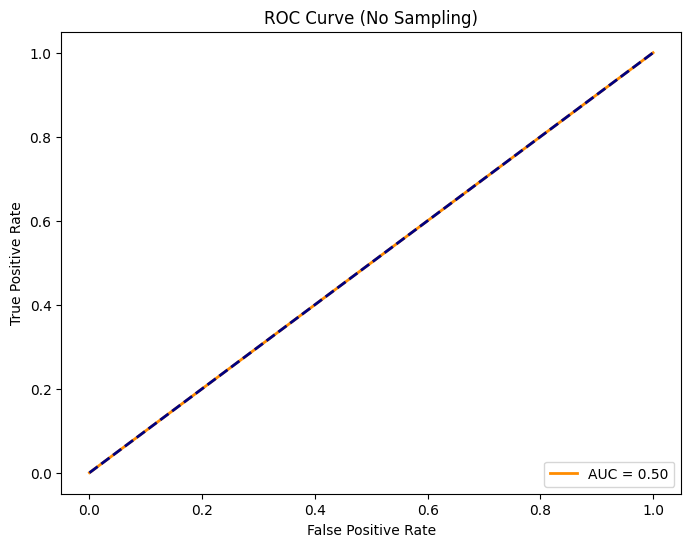

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 993us/step - loss: 0.5630 - accuracy: 0.7219
Epoch 2/30
726/726 [==============================] - 1s 994us/step - loss: 0.4897 - accuracy: 0.7657
Epoch 3/30
726/726 [==============================] - 1s 975us/step - loss: 0.4591 - accuracy: 0.7786
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4366 - accuracy: 0.7916
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4187 - accuracy: 0.8069
Epoch 6/30
726/726 [==============================] - 1s 986us/step - loss: 0.4037 - accuracy: 0.8150
Epoch 7/30
726/726 [==============================] - 1s 985us/step - loss: 0.3923 - accuracy: 0.8219
Epoch 8/30
726/726 [==============================] - 1s 977us/step - loss: 0.3825 - accuracy: 0.8258
Epoch 9/30
726/726 [==============================] - 1s 978us/step - loss: 0.3743 - accuracy: 0.8332
Epoch 10/30
726/726 [==============================] - 1s 972us/step - loss: 0.3676 - accuracy: 0

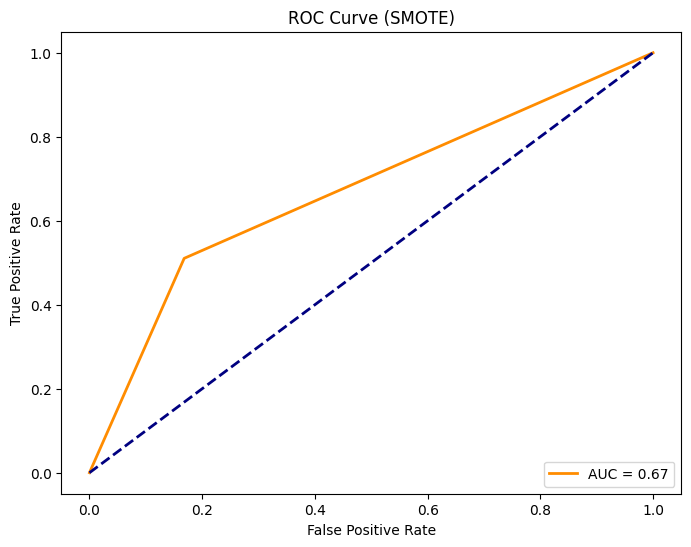

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 996us/step - loss: 0.5861 - accuracy: 0.6944
Epoch 2/30
726/726 [==============================] - 1s 949us/step - loss: 0.5191 - accuracy: 0.7489
Epoch 3/30
726/726 [==============================] - 1s 961us/step - loss: 0.4975 - accuracy: 0.7564
Epoch 4/30
726/726 [==============================] - 1s 978us/step - loss: 0.4811 - accuracy: 0.7659
Epoch 5/30
726/726 [==============================] - 1s 950us/step - loss: 0.4678 - accuracy: 0.7731
Epoch 6/30
726/726 [==============================] - 1s 952us/step - loss: 0.4576 - accuracy: 0.7814
Epoch 7/30
726/726 [==============================] - 1s 946us/step - loss: 0.4484 - accuracy: 0.7839
Epoch 8/30
726/726 [==============================] - 1s 942us/step - loss: 0.4420 - accuracy: 0.7883
Epoch 9/30
726/726 [==============================] - 1s 949us/step - loss: 0.4358 - accuracy: 0.7919
Epoch 10/30
726/726 [==============================] - 1s 938us/step - loss: 0.4302 - accurac

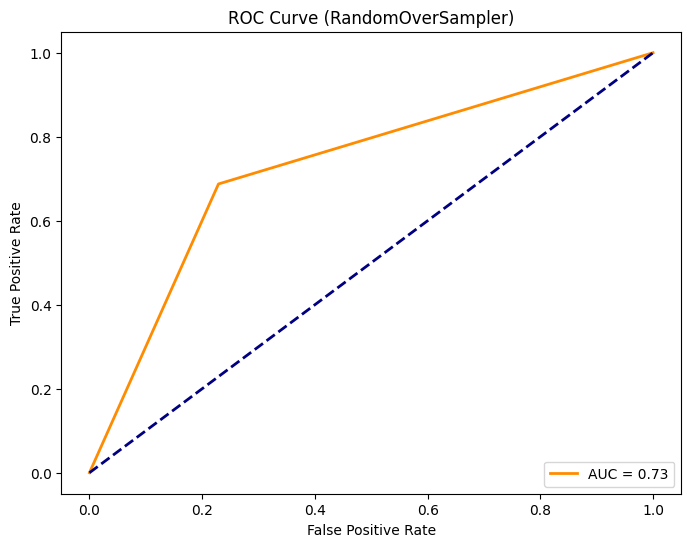

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5366
Epoch 2/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6588 - accuracy: 0.6360
Epoch 3/30
46/46 [==============================] - 0s 956us/step - loss: 0.6321 - accuracy: 0.6575
Epoch 4/30
46/46 [==============================] - 0s 978us/step - loss: 0.6120 - accuracy: 0.6616
Epoch 5/30
46/46 [==============================] - 0s 956us/step - loss: 0.5969 - accuracy: 0.6706
Epoch 6/30
46/46 [==============================] - 0s 978us/step - loss: 0.5847 - accuracy: 0.6809
Epoch 7/30
46/46 [==============================] - 0s 978us/step - loss: 0.5753 - accuracy: 0.6899
Epoch 8/30
46/46 [==============================] - 0s 956us/step - loss: 0.5663 - accuracy: 0.6948
Epoch 9/30
46/46 [==============================] - 0s 956us/step - loss: 0.5571 - accuracy: 0.7210
Epoch 10/30
46/46 [==============================] - 0s 956us/step - loss: 0.5480 - accuracy: 0.7334
Epoch 11/30
46

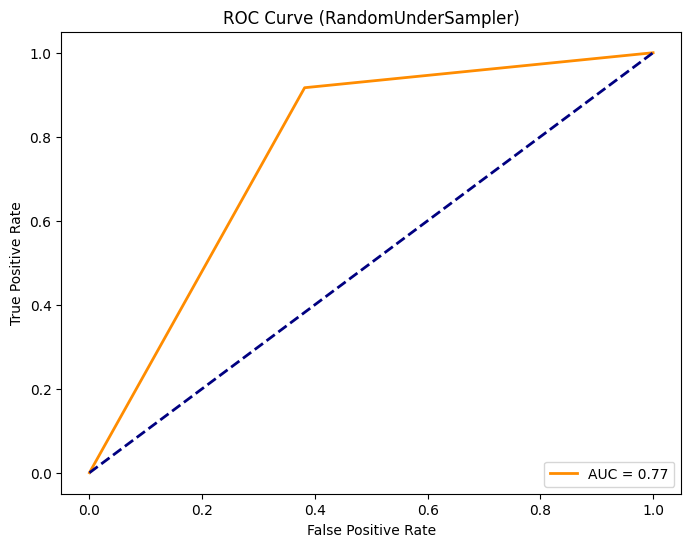

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


338/338 [==============================] - 1s 994us/step - loss: 0.2966 - accuracy: 0.8962
Epoch 2/30
338/338 [==============================] - 0s 961us/step - loss: 0.2270 - accuracy: 0.9329
Epoch 3/30
338/338 [==============================] - 0s 973us/step - loss: 0.2148 - accuracy: 0.9329
Epoch 4/30
338/338 [==============================] - 0s 982us/step - loss: 0.2070 - accuracy: 0.9329
Epoch 5/30
338/338 [==============================] - 0s 953us/step - loss: 0.2024 - accuracy: 0.9329
Epoch 6/30
338/338 [==============================] - 0s 938us/step - loss: 0.1994 - accuracy: 0.9328
Epoch 7/30
338/338 [==============================] - 0s 935us/step - loss: 0.1969 - accuracy: 0.9326
Epoch 8/30
338/338 [==============================] - 0s 941us/step - loss: 0.1950 - accuracy: 0.9325
Epoch 9/30
338/338 [==============================] - 0s 941us/step - loss: 0.1943 - accuracy: 0.9327
Epoch 10/30
338/338 [==============================] - 0s 938us/step - loss: 0.1931 - accurac

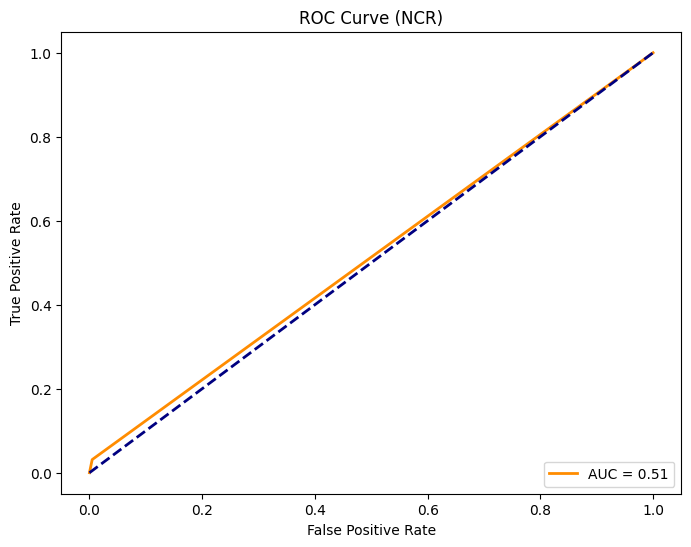

In [4]:
results={}

#No Sampling
metrics = train_ann(X_train,y_train, X_val,y_val,'No Sampling')
results[metrics[0]] = metrics[1:]

#smote
X_smote, y_smote = smote(X_train, y_train)

metrics = train_ann(X_smote, y_smote, X_val,y_val,'SMOTE')
results[metrics[0]] = metrics[1:]

#oversampling
X_over, y_over = oversample(X_train, y_train)

metrics = train_ann(X_over, y_over, X_val,y_val,'RandomOverSampler')
results[metrics[0]] = metrics[1:]

#undersampling
X_under, y_under = undersample(X_train, y_train)

metrics = train_ann(X_under, y_under, X_val,y_val,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]

#ncr
X_ncr, y_ncr = ncr(X_train, y_train)
metrics = train_ann(X_ncr, y_ncr, X_val,y_val,'NCR')
results[metrics[0]] = metrics[1:]

In [5]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision',  'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler,0.917,0.138,0.239,0.637
RandomOverSampler,0.688,0.166,0.268,0.766
SMOTE,0.510,0.168,0.253,0.812
NCR,0.031,0.300,0.057,0.935
No Sampling,0.000,0.000,0.000,0.938


```Hyper-Parameter Tuning```

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

model = KerasClassifier(build_fn=ann, optimizer="adam", epochs=30, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam'],  # Optimizer choices
    'activation': ['relu', 'sigmoid'],  # Activation functions
    'hidden_units': [8, 16, 32],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32],  # Batch size for training
    'epochs': [30, 40],  # Number of training epochs
    'dropout_rate': [0.0, 0.1, 0.2],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(recall_score), cv=3)
grid_result = grid.fit(X_over, y_over)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Err

Best: 0.940314 using {'activation': 'sigmoid', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 30, 'hidden_units': 16, 'learning_rate': 0.001, 'optimizer': 'adam'}


#### New ANN model with tuned hyperparameters

In [10]:

def train_ann_tuned(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):

   
    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='sigmoid', 
                            dropout_rate=0.2, hidden_units=16, learning_rate=0.001, 
                            batch_size=32, epochs=30)
    
    model.fit(X_train, y_train, class_weight=class_weights)
   
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

#### Apply tuned model to training sets 

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


386/386 [==============================] - 1s 1ms/step - loss: 0.3232 - accuracy: 0.9043
Epoch 2/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2316 - accuracy: 0.9413
Epoch 3/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2271 - accuracy: 0.9413
Epoch 4/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2225 - accuracy: 0.9413
Epoch 5/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2150 - accuracy: 0.9413
Epoch 6/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2108 - accuracy: 0.9413
Epoch 7/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2055 - accuracy: 0.9413
Epoch 8/30
386/386 [==============================] - 0s 1ms/step - loss: 0.2023 - accuracy: 0.9413
Epoch 9/30
386/386 [==============================] - 0s 1ms/step - loss: 0.1989 - accuracy: 0.9413
Epoch 10/30
386/386 [==============================] - 0s 1ms/step - loss: 0.1968 - accuracy: 0.9413
Epoch 11/3

C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

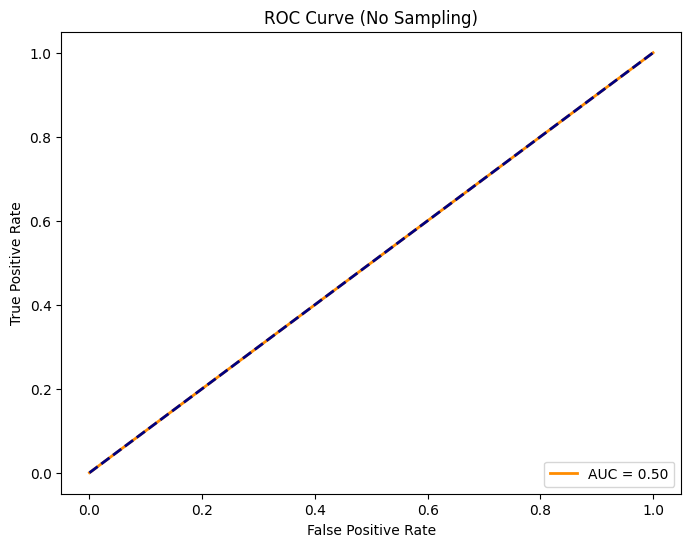

C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
726/726 [==============================] - 1s 1ms/step - loss: 0.6330 - accuracy: 0.6416
Epoch 2/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5651 - accuracy: 0.7176
Epoch 3/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5406 - accuracy: 0.7404
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5244 - accuracy: 0.7473
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5166 - accuracy: 0.7532
Epoch 6/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5084 - accuracy: 0.7543
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5046 - accuracy: 0.7545
Epoch 8/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4986 - accuracy: 0.7595
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4959 - accuracy: 0.7580
Epoch 10/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4927 - accuracy: 0.7588

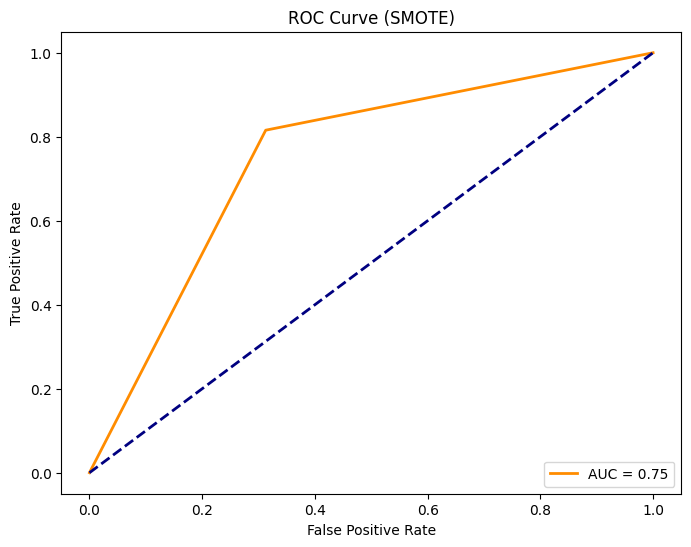

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 1ms/step - loss: 0.6394 - accuracy: 0.6293
Epoch 2/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5727 - accuracy: 0.7061
Epoch 3/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5506 - accuracy: 0.7263
Epoch 4/30
726/726 [==============================] - 1s 988us/step - loss: 0.5369 - accuracy: 0.7379
Epoch 5/30
726/726 [==============================] - 1s 982us/step - loss: 0.5274 - accuracy: 0.7397
Epoch 6/30
726/726 [==============================] - 1s 983us/step - loss: 0.5209 - accuracy: 0.7420
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5161 - accuracy: 0.7415
Epoch 8/30
726/726 [==============================] - 1s 994us/step - loss: 0.5097 - accuracy: 0.7456
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5065 - accuracy: 0.7448
Epoch 10/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5016 - accuracy: 0.7477
Ep

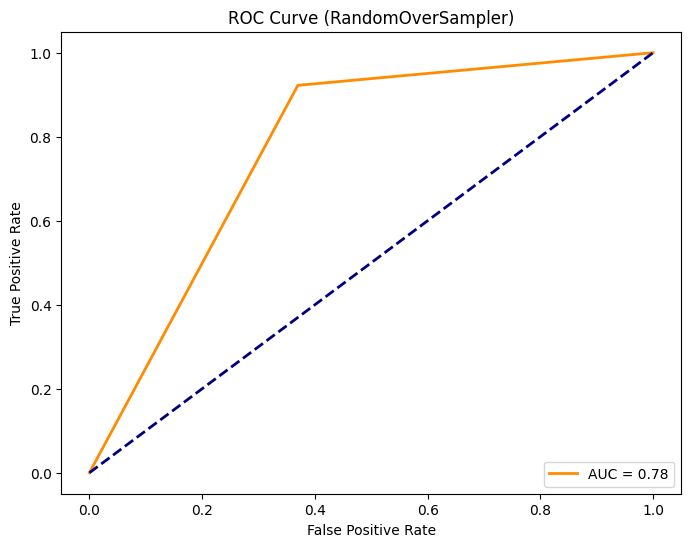

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 0s 1ms/step - loss: 0.7576 - accuracy: 0.5007
Epoch 2/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5608
Epoch 3/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.5746
Epoch 4/30
46/46 [==============================] - 0s 978us/step - loss: 0.6670 - accuracy: 0.5822
Epoch 5/30
46/46 [==============================] - 0s 978us/step - loss: 0.6619 - accuracy: 0.6112
Epoch 6/30
46/46 [==============================] - 0s 1000us/step - loss: 0.6495 - accuracy: 0.6188
Epoch 7/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6362 - accuracy: 0.6409
Epoch 8/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6325 - accuracy: 0.6464
Epoch 9/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6187 - accuracy: 0.6595
Epoch 10/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6143 - accuracy: 0.6616
Epoch 11/30
46/46 [====

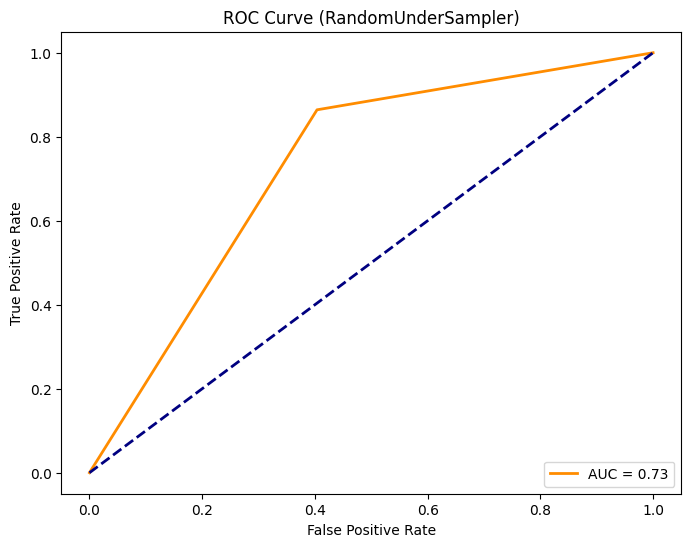

Epoch 1/30


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


338/338 [==============================] - 1s 1ms/step - loss: 0.3445 - accuracy: 0.8912
Epoch 2/30
338/338 [==============================] - 0s 1ms/step - loss: 0.2561 - accuracy: 0.9329
Epoch 3/30
338/338 [==============================] - 0s 1ms/step - loss: 0.2454 - accuracy: 0.9329
Epoch 4/30
338/338 [==============================] - 0s 1ms/step - loss: 0.2360 - accuracy: 0.9329
Epoch 5/30
338/338 [==============================] - 0s 1ms/step - loss: 0.2267 - accuracy: 0.9329
Epoch 6/30
338/338 [==============================] - 0s 1ms/step - loss: 0.2180 - accuracy: 0.9329
Epoch 7/30
338/338 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.9329
Epoch 8/30
338/338 [==============================] - 0s 1ms/step - loss: 0.2114 - accuracy: 0.9329
Epoch 9/30
338/338 [==============================] - 0s 1000us/step - loss: 0.2073 - accuracy: 0.9329
Epoch 10/30
338/338 [==============================] - 0s 1ms/step - loss: 0.2064 - accuracy: 0.9329
Epoch 1

C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

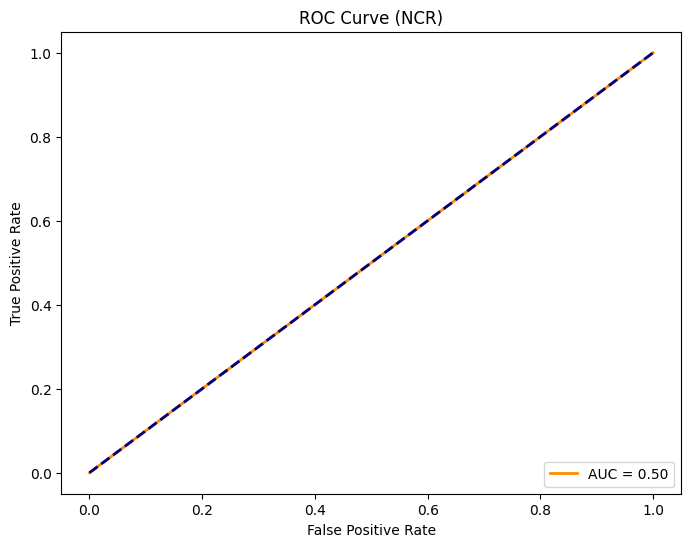

In [11]:
results={}

#No Sampling
metrics = train_ann_tuned(X_train,y_train,X_test,y_test,'No Sampling')
results[metrics[0]] = metrics[1:]

#smote
X_smote, y_smote = smote(X_train, y_train)

metrics = train_ann_tuned(X_smote, y_smote, X_test, y_test,'SMOTE')
results[metrics[0]] = metrics[1:]

#oversampling
X_over, y_over = oversample(X_train, y_train)

metrics = train_ann_tuned(X_over, y_over, X_test, y_test,'RandomOverSampler')
results[metrics[0]] = metrics[1:]

#undersampling
X_under, y_under = undersample(X_train, y_train)

metrics = train_ann_tuned(X_under, y_under, X_test, y_test,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]

#ncr
X_ncr, y_ncr = ncr(X_train, y_train)

metrics = train_ann_tuned(X_ncr, y_ncr, X_test, y_test,'NCR')
results[metrics[0]] = metrics[1:]

In [12]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomOverSampler,0.922,0.152,0.260,0.650
RandomUnderSampler,0.864,0.133,0.230,0.614
SMOTE,0.816,0.157,0.264,0.696
No Sampling,0.000,0.000,0.000,0.933
NCR,0.000,0.000,0.000,0.933
